<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/la-conga-dataanalysis/la-conga-da-student/-/raw/master/imgs/banner_DA.png"  width="1000px" height="200px">



# <center> **01. Machine learning: an introduction!** </center>


## **Outline**

1. [**Introduction Supervised learning:  the Classification**](#eje2)
2. [**The Naive Gaussian Bayes: Solving a real classification problem**](#eje4)
    

In [ ]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "ML-20221-Laconga" #@param {type:"string"}
assignment_id = group_id +'.machine_learning'
student_id = "2218109" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
""" 

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student')
print(os.getcwd())

In [ ]:
#@title 2. **LOAD LIB** { display-mode: "form" }
from __future__ import division, print_function, unicode_literals #py2 and py3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import KFold
from sklearn.metrics import *

# **1. Introduction Supervised learning:  the Classification**  <a name="eje2">

   - The classification is the problem of predicting a discrete class label output for an example.
   - The regression is the problem of predicting a continuous quantity output for an example
    
**Function Approximation:** The idea is  developing a model using historical data to make a prediction on new data where we do not have the answer. This is done by approximating a function:    

$$\hat{f}: x(t) \to y(t)$$

$x(t) = \left \{ x_1, x_2, \ldots x_n  \right \}$ is input data, while $y(t) = \left \{0,1 \right \}$ is output data. For classification, $y(t)$ are discrete output variables. For instance, an e-mail can classified as "spam" and "nor-spam"


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/PipelineImage.jpg" style="width:1000px;">

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- What means features?
- What is supervised learning?
- Which means learn in artifitial intelligencence?


### Some examples...

1. Text categorization (spam filtering)
2. fraud detection
3. Optical character recognition
4. machine vision (face and action recognition)
5. natural-language processing (spoken languaje recognition)
6. market segmentation (predict if customer will respond to a promotion)
7. bioinformatics (classify proteins according their function)



# **2. The Naive Gaussian Bayes: Solving a real classification problem** <a name="eje3"></a>




Given a new trilobite $x$ for which we do not know its class, Naive Bayes works as follows to estimate it:
    
- Estimate $P(0|x)$ and $P(1|x)$, the probability of the class being 0 or 1 given the piece of data that we have now ($x$)
- Choose the one with highest probability.

Stop and think from a Bayesian perspective. What information we had before seeing $x$?

Using Bayes:

$$P(0|x) = \frac{P(x|0) P(0)}{P(x)} \;\;\;\;\;\;\;\;P(1|x) = \frac{P(x|1) P(1)}{P(x)}$$

- $P(0)$ and $P(1)$ is the probability of seen an american or an african trilobite
- $P(x|0)$ is the probability of our new trilobite $x$ belonging to class 0. $P(x|1)$ likewise for class 1.
- $P(x)$ is the absolute probability of $x$.

How can we compute each term so that we can estimate $P(0|x)$ and $P(1|x)$?

- for $P(0)$ and $P(1)$ we can use the frequencies of appearance observed in our dataset
- for $P(x|0)$ (or $P(x|1)$ we do not know their distributions (their shape in the charts above). We can **assume they are Gaussian** and use the corresponding PDF to compute probabilities.
- $P(x)$ is very hard, but we do not really need it as it is a common factor of $P(0|x)$ and $P(1|x)$, $\in [0,1]$, and we are only interested in their comparison.

Now, for the Gaussian PDF of $P(x|0)$ we need two parameters: $\mu_0$ and $\sigma_0$, which we can estimate using the corresponding items from our dataset.


### **Some advantajes**

- An advantage of naive Bayes is that it only requires a small number of training data to estimate the parameters necessary for classification
 
-  A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

- It is not necessary the computation of covariance matrix 

## **Go to real-life!: an example**

see dataset description at:   

load a dataset

Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

##**Thecnical information in complement notes .. !!**

In [ ]:
#@title **code** To read the dataset
d = pd.read_csv("data/data_banknote_authentication.txt.gz")
print(d.shape) 
d.head()

(1372, 5)


,varwt,skewt,curwt,entrwt,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

First inspection of data and binary relationships.

- are variables normal?
- what relations do you see?

(1372, 5)
(1372, 4) (1372,)


,varwt,skewt,curwt,entrwt,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


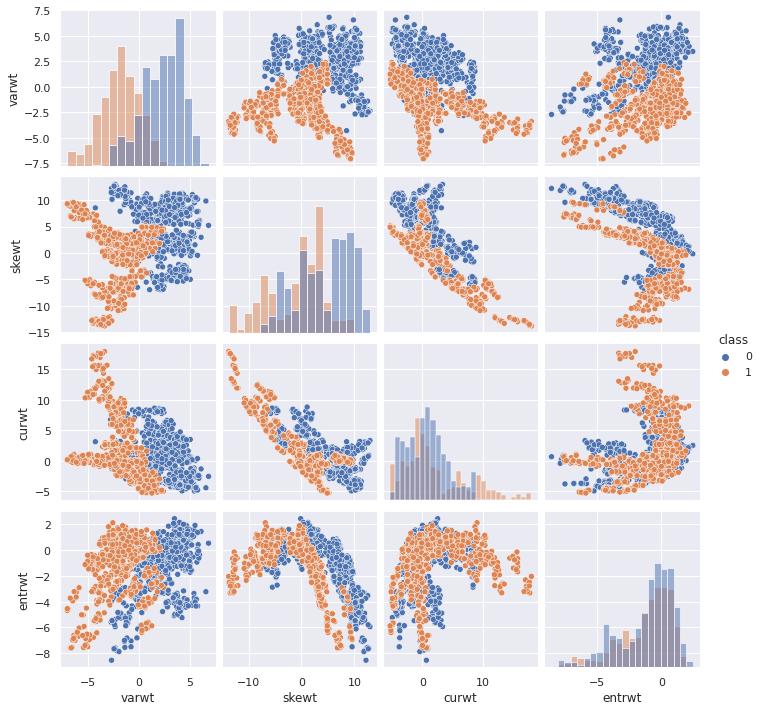

In [ ]:
#@title **code** Read dataset and split into features and labels
d = pd.read_csv("data/data_banknote_authentication.txt.gz")
print(d.shape)
X = d.values[:,:-1]
y = d.values[:,-1]
sns.pairplot(d, hue="class", diag_kind="hist");# kind="kde"
print(X.shape, y.shape)
d.head()

In [ ]:
#@title **code** 1. Split data.  X: input columns and y: colum to be predicted

X = d.values[:,:-1]
y = d.values[:,-1]

print(X.shape, y.shape)


(1372, 4) (1372,)


In [ ]:
#@title **code** 2. Now create an estimator, train and predict
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
est = GaussianNB()
print(X.shape, y.shape)
est.fit(X,y)
predictions = est.predict(X)
print( "first 100 predictions", predictions[:100])
print( "first 100 targets    ", y[:100])


(1372, 4) (1372,)
first 100 predictions [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 1.]
first 100 targets     [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
#@title **code** 3. To obtain the general performance of the approach
#@markdown The simplest and more intuitive metric for classification  is accuracy
print("%.3f"%accuracy_score(predictions, y))

0.841


In [ ]:
#@title **code** Play with new banknote samples.
varwt = 3.36 #@param {type:"number"}
skewt = 8.66 #@param {type:"number"}
curwt = -2.80 #@param {type:"number"}
entrwt = -0.44 #@param {type:"number"}


feature = np.array([varwt, skewt, curwt, entrwt]).reshape(1, -1)
print("La predicción es: ", est.predict(feature))

print("Para una nueva variable")
print(" features: ", X[2], "clase: ", y[2])
print("La predicción es: ", est.predict(X[2].reshape(1, -1)))

La predicción es:  [0.]
Para una nueva variable
 features:  [ 3.866   -2.6383   1.9242   0.10645] clase:  0.0
La predicción es:  [0.]


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- The validation of the approach is correct?
- We can take high confidence of such approach?

**Wait!**. We are cheating!! cannot use same data for training and for test. let's use the first half for training and the rest for test

In [ ]:
#@title **code:** A new experiment over the same data!
n = int(len(X)/2)
est.fit(X[:n], y[:n])
print("%.3f"%accuracy_score(est.predict(X[n:]), y[n:]))

0.111


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- What happened?!?!?
- Why so different?

In [ ]:
#@title **code** Let see
print("first 100", y[:100])
print("last  100", y[-100:])
print("class distribution", [(i, sum(y==i)) for i in np.unique(y)])

first 100 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
last  100 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
class distribution [(0.0, 762), (1.0, 610)]


data is not shuffled, we are training only with one class. understand next chart and how it is built

Text(0.5, 0, 'n')

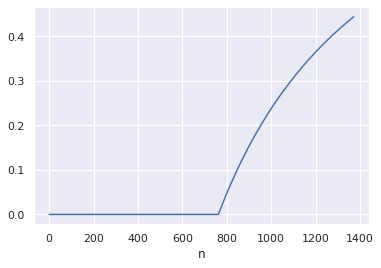

In [ ]:
#@title **code** Plot
t = range(1,len(y))
p = [np.mean(y[:i]) for i in t]
plt.plot(t,p)
plt.xlabel("n")

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

-Now, shuffle and split data with 30% for test
- Run the classifier and show the results


In [ ]:
#@title  **code student**




<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">


##**Thecnical information in complement notes .. !!**

- Now, Run the Gaussian Naive for the Breast Cancer dataset and enjoy!

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0


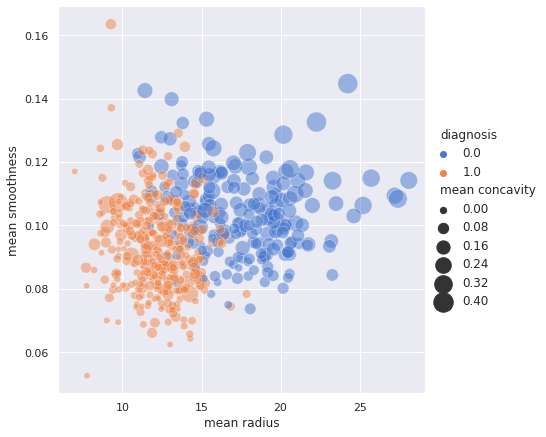

In [ ]:
#@title **Breast cancer dataset**
variable_x = "mean radius" #@param {type:"string"}
variable_y = "mean smoothness" #@param {type:"string"}
variable_s = "mean concavity" #@param {type:"string"}


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
sns.set_theme()


cancer = load_breast_cancer()
data_bc = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['diagnosis']))
sns.relplot(x=variable_x, y=variable_y, hue="diagnosis", size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data_bc)

data_bc.head(2)

In [ ]:
#@title **code student**




# **References**

[1] Tutorial on k-fold cross validation https://machinelearningmastery.com/k-fold-cross-validation/

[2] Titanic dataset. https://www.kaggle.com/c/titanic

[3] Sensitivity and specificity: https://en.wikipedia.org/wiki/Sensitivity_and_specificity

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
